Data downloaded from http://aws.medialabkatowice.eu/db/:

* `events`
* `users_participating_events`

In [59]:
%matplotlib inline
import pandas as pd
import numpy as np

## events

In [35]:
events = pd.read_csv("data/events.csv", index_col='facebook_id')

In [36]:
events.columns

Index(['facebook_page', 'picture', 'description', 'comments',
       'attending_count', 'end_time', 'start_time', 'place', 'maybe_count',
       'noreply_count', 'declined_count', 'name', 'feed', 'created_at',
       'owner_name', 'owner_id', 'place_name', 'place_lat', 'place_lng',
       'has_place', 'has_multiple_places', 'is_excursion', 'is_katowice',
       'is_reviewed'],
      dtype='object')

In [38]:
events[['facebook_page', 'name', 'place_name', 'owner_id', 'owner_name']].head()

,facebook_page,name,place_name,owner_id,owner_name
facebook_id,,,,,
1000321563316078,128885767128773,Wystawa fotografii: Jean-Manuel Simoes „Chiens...,Galeria Sztuki Współczesnej BWA w Katowicach,1.288858e+14,Galeria Sztuki Współczesnej BWA w Katowicach
1000474419998733,151621484856829,Jarosław Kassner - wernisaż,NaN,1.516215e+14,"MDK ""Południe"" w Katowicach"
1000519489971322,247487101951365,Filmowy Klub Seniora - Idol,Kinoteatr Rialto,2.474871e+14,Kinoteatr Rialto
1000566356639241,329754960510682,Salon Artystyczny,Miejski Dom Kultury Koszutka,3.297550e+14,Miejski Dom Kultury Koszutka
1001073743249429,109713522693196,"Premierowa sprzedaż książki ""Grey. Pięćdziesią...",Bookszpan Katowice,1.097135e+14,Bookszpan Katowice


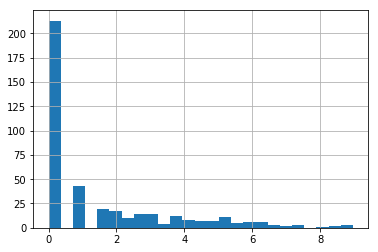

In [39]:
events.groupby('owner_id').size().apply(np.log2).hist(bins=25)

In [40]:
(events['attending_count'] > 0).mean()

0.86741424802110823

## participation

In [7]:
participation = pd.read_csv("data/users_participating_events.csv")

In [8]:
participation.head()

,user_facebook_id,rsvp_status,event_facebook_id
0,201098027006232,attending,1606969096264134
1,334566996897353,attending,1606969096264134
2,354393944896674,attending,1606969096264134
3,1698350500494930,attending,1606969096264134
4,1775177359410467,attending,1606969096264134


In [71]:
participation.shape

(3667328, 3)

In [9]:
participation.rsvp_status.value_counts()

noreply      2197263
attending     713301
maybe         630614
declined      126150
Name: rsvp_status, dtype: int64

In [ ]:
participation.rsvp_status.value_counts()

## consistency

In [33]:
participants = participation.pivot_table(index='event_facebook_id', columns='rsvp_status',
                                         values='user_facebook_id',  # to make flat col index
                                         aggfunc='count', fill_value=0)
participants.head()

rsvp_status,attending,declined,maybe,noreply
event_facebook_id,,,,
100668907024083,201,1,595,197
100671793684638,23,1,85,77
100741577016748,0,0,1,0
100755470299906,1,0,1,0
100860333400630,21,3,8,9


In [46]:
event_counts = events[['attending_count', 'declined_count', 'maybe_count','noreply_count']]
event_counts = event_counts.loc[lambda df: df.sum(1) > 0]
event_counts.head()

,attending_count,declined_count,maybe_count,noreply_count
facebook_id,,,,
1000321563316078,299,37,25,271
1000474419998733,19,4,8,180
1000519489971322,8,1,1,0
1000566356639241,5,0,0,0
1001073743249429,292,73,6,5


In [44]:
len(participants)

6715

In [47]:
len(events)

7580

In [48]:
len(event_counts)

6862

In [53]:
len(set(participants.index) - set(event_counts.index))

6

In [54]:
len(set(event_counts.index) - set(participants.index))

153

In [56]:
event_counts.loc[set(event_counts.index) - set(participants.index)].mean()

attending_count     45.496732
declined_count      12.045752
maybe_count         54.176471
noreply_count      183.934641
dtype: float64

In [58]:
combined = event_counts.join(participants, how='inner')
combined.head()

,attending_count,declined_count,maybe_count,noreply_count,attending,declined,maybe,noreply
1000321563316078,299,37,25,271,287,36,24,260
1000474419998733,19,4,8,180,18,4,8,176
1000519489971322,8,1,1,0,8,0,1,0
1000566356639241,5,0,0,0,4,0,0,0
1001073743249429,292,73,6,5,281,71,6,5


In [62]:
combined[sorted(combined.columns)].corr()

,attending,attending_count,declined,declined_count,maybe,maybe_count,noreply,noreply_count
attending,1.000000,0.990536,0.599925,0.594222,0.650342,0.663455,0.533421,0.596726
attending_count,0.990536,1.000000,0.618158,0.613407,0.613946,0.638531,0.522845,0.599223
declined,0.599925,0.618158,1.000000,0.999838,0.090592,0.092667,0.550877,0.692485
declined_count,0.594222,0.613407,0.999838,1.000000,0.086070,0.088316,0.551413,0.692993
maybe,0.650342,0.613946,0.090592,0.086070,1.000000,0.951147,0.461106,0.405595
maybe_count,0.663455,0.638531,0.092667,0.088316,0.951147,1.000000,0.478171,0.423540
noreply,0.533421,0.522845,0.550877,0.551413,0.461106,0.478171,1.000000,0.956771
noreply_count,0.596726,0.599223,0.692485,0.692993,0.405595,0.423540,0.956771,1.000000


In [69]:
combined_norm = combined.div(combined['attending'], axis=0)

In [70]:
combined_norm[sorted(combined_norm.columns)].corr()

,attending,attending_count,declined,declined_count,maybe,maybe_count,noreply,noreply_count
attending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
attending_count,NaN,1.000000,0.181165,0.184832,-0.086150,-0.038752,0.121301,0.143479
declined,NaN,0.181165,1.000000,0.997783,0.008291,0.021710,0.530620,0.564969
declined_count,NaN,0.184832,0.997783,1.000000,0.008131,0.022013,0.534366,0.571889
maybe,NaN,-0.086150,0.008291,0.008131,1.000000,0.989131,0.248763,0.230461
maybe_count,NaN,-0.038752,0.021710,0.022013,0.989131,1.000000,0.250584,0.237310
noreply,NaN,0.121301,0.530620,0.534366,0.248763,0.250584,1.000000,0.990945
noreply_count,NaN,0.143479,0.564969,0.571889,0.230461,0.237310,0.990945,1.000000


In [ ]:
# differences, but correlations are high enough I shouldn't bother